In [2]:
import pandas as pd
import csv
import pyodbc
from kmodes.kmodes import KModes

In [ ]:
#SHI6 for employee insurance contribution towards prem

In [3]:
database = "AlgoRhythmDB"
user = "AlgorhythmUser"
password  = "DataSPROL!"
server = "gen10-data-fundamentals-21-11-sql-server.database.windows.net"

In [4]:
conn_str = ("Driver={SQL Server};"
            "Server=" + server + ";"
            "Database=" + database + ";"
            "UID=" + user + ";"
            "PWD=" + password + ";")
conn = pyodbc.connect(conn_str)

df = pd.io.sql.read_sql("SELECT * from Health_Insurance_Data_Table", conn)

In [18]:
#df = pd.read_csv("pppub21.csv")

In [6]:
df

,PEHSPNON,PH_SEQ,AGE1,PEAFEVER,A_HGA,A_SEX,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,...,MOOP2,PEMCPREM,PHIP_VAL,POTC_VAL,PMED_VAL,PHIP_VAL2,PECOULD,PEOFFER,HEA,timestamp
0,2,1,12,2,39,2,1,2,2,1,...,200,0,0,200,0,0,0,0,4,1643833715931
1,1,1,12,2,39,1,2,2,2,2,...,200,0,0,200,0,0,0,0,3,1643833717590
2,2,1,17,2,39,2,2,2,1,2,...,500,3000,0,500,0,0,0,0,4,1643833718598
3,2,2,15,2,43,2,2,1,2,2,...,6600,0,2400,200,4000,2400,0,0,3,1643833719649
4,2,2,15,2,39,1,2,2,2,2,...,2200,0,0,200,2000,0,0,2,3,1643833720654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,1,47544,0,-1,0,2,-1,-1,-1,-1,...,50,0,0,50,0,0,0,0,1,1643917363514
163539,1,47544,0,-1,0,2,-1,-1,-1,-1,...,50,0,0,50,0,0,0,0,1,1643917364520
163540,2,47544,6,2,39,2,2,2,2,2,...,75,0,0,75,0,0,0,0,1,1643917365574
163541,1,47550,14,2,33,1,2,2,2,2,...,3100,0,2400,300,400,2400,0,0,2,1643917366630


In [7]:
df2 = df[["PEHSPNON","PH_SEQ","AGE1","PEAFEVER","A_HGA","A_SEX","PEDISDRS","PEDISEAR","PEDISEYE","PEDISOUT","PEDISPHY","PEDISREM","PRDISFLG","PRDTRACE","A_MJIND","A_GRSWK","A_HRSPAY","A_CLSWKR","A_WKSTAT","PEARNVAL","PTOTVAL","AGI","PERLIS","COV","COV_CYR","PUB","PUB_CYR","DEPPRIV","GRP","DIR","MRK","NONM","CAID","OTHMT","MCARE","MIL","CHAMPVA","VACARE","MOOP","MOOP2","PEMCPREM","PHIP_VAL","POTC_VAL","PMED_VAL","PHIP_VAL2","POTC_VAL","HEA"]]

df2

,PEHSPNON,PH_SEQ,AGE1,PEAFEVER,A_HGA,A_SEX,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,...,VACARE,MOOP,MOOP2,PEMCPREM,PHIP_VAL,POTC_VAL,PMED_VAL,PHIP_VAL2,POTC_VAL,HEA
0,2,1,12,2,39,2,1,2,2,1,...,2,200,200,0,0,200,0,0,200,4
1,1,1,12,2,39,1,2,2,2,2,...,2,200,200,0,0,200,0,0,200,3
2,2,1,17,2,39,2,2,2,1,2,...,2,500,500,3000,0,500,0,0,500,4
3,2,2,15,2,43,2,2,1,2,2,...,2,6600,6600,0,2400,200,4000,2400,200,3
4,2,2,15,2,39,1,2,2,2,2,...,2,2200,2200,0,0,200,2000,0,200,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,1,47544,0,-1,0,2,-1,-1,-1,-1,...,2,50,50,0,0,50,0,0,50,1
163539,1,47544,0,-1,0,2,-1,-1,-1,-1,...,2,50,50,0,0,50,0,0,50,1
163540,2,47544,6,2,39,2,2,2,2,2,...,2,75,75,0,0,75,0,0,75,1
163541,1,47550,14,2,33,1,2,2,2,2,...,2,3100,3100,0,2400,300,400,2400,300,2


In [8]:
df3 = df2[df2["COV"] == 1]

df3

,PEHSPNON,PH_SEQ,AGE1,PEAFEVER,A_HGA,A_SEX,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,...,VACARE,MOOP,MOOP2,PEMCPREM,PHIP_VAL,POTC_VAL,PMED_VAL,PHIP_VAL2,POTC_VAL,HEA
0,2,1,12,2,39,2,1,2,2,1,...,2,200,200,0,0,200,0,0,200,4
1,1,1,12,2,39,1,2,2,2,2,...,2,200,200,0,0,200,0,0,200,3
2,2,1,17,2,39,2,2,2,1,2,...,2,500,500,3000,0,500,0,0,500,4
3,2,2,15,2,43,2,2,1,2,2,...,2,6600,6600,0,2400,200,4000,2400,200,3
4,2,2,15,2,39,1,2,2,2,2,...,2,2200,2200,0,0,200,2000,0,200,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163534,2,47539,16,2,44,2,2,2,2,2,...,2,3000,3000,1735,0,0,3000,0,0,2
163535,1,47541,12,2,43,2,2,2,2,2,...,2,5100,5100,0,3600,700,800,3600,700,4
163536,2,47541,17,1,43,1,1,2,2,1,...,2,9700,9700,3600,5000,700,4000,5000,700,5
163541,1,47550,14,2,33,1,2,2,2,2,...,2,3100,3100,0,2400,300,400,2400,300,2


In [9]:
df4 = df3[["AGE1","PEDISDRS","PEDISEAR","PEDISEYE","PEDISOUT","PEDISPHY","PEDISREM","PRDISFLG","HEA"]]

df4 = df4[df4["AGE1"] > 5]

df4

,AGE1,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,PEDISPHY,PEDISREM,PRDISFLG,HEA
0,12,1,2,2,1,1,1,1,4
1,12,2,2,2,2,2,2,2,3
2,17,2,2,1,2,2,2,1,4
3,15,2,1,2,2,2,2,1,3
4,15,2,2,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...
163533,16,2,2,2,2,2,2,2,2
163534,16,2,2,2,2,2,2,2,2
163535,12,2,2,2,2,2,2,2,4
163536,17,1,2,2,1,1,1,1,5


In [10]:
df5 = pd.get_dummies(data=df4, columns=['AGE1', 'HEA'], drop_first= True)

df5

,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,PEDISPHY,PEDISREM,PRDISFLG,AGE1_7,AGE1_8,AGE1_9,...,AGE1_12,AGE1_13,AGE1_14,AGE1_15,AGE1_16,AGE1_17,HEA_2,HEA_3,HEA_4,HEA_5
0,1,2,2,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,2,2,2,2,2,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,2,1,2,2,2,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,1,2,2,2,2,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2,2,2,2,2,2,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163533,2,2,2,2,2,2,2,0,0,0,...,0,0,0,0,1,0,1,0,0,0
163534,2,2,2,2,2,2,2,0,0,0,...,0,0,0,0,1,0,1,0,0,0
163535,2,2,2,2,2,2,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
163536,1,2,2,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
df6 = pd.concat([df4,df5], axis=1)

df6.drop(["AGE1","HEA"], axis=1, inplace=True)

df6["PEDISDRS"] = df6["PEDISDRS"].replace([1,2],[0,1])
df6["PEDISEAR"] = df6["PEDISEAR"].replace([1,2],[0,1])
df6["PEDISEYE"] = df6["PEDISEYE"].replace([1,2],[0,1])
df6["PEDISOUT"] = df6["PEDISOUT"].replace([1,2],[0,1])
df6["PEDISPHY"] = df6["PEDISPHY"].replace([1,2],[0,1])
df6["PEDISREM"] = df6["PEDISREM"].replace([1,2],[0,1])
df6["PRDISFLG"] = df6["PRDISFLG"].replace([1,2],[0,1])

df6

,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,PEDISPHY,PEDISREM,PRDISFLG,PEDISDRS,PEDISEAR,PEDISEYE,...,AGE1_12,AGE1_13,AGE1_14,AGE1_15,AGE1_16,AGE1_17,HEA_2,HEA_3,HEA_4,HEA_5
0,0,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0
2,1,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,1,1,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163533,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
163534,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
163535,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0
163536,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [12]:
allcolumns = df6

In [13]:
km2 = KModes(n_clusters=7, init='random', n_init=10, verbose=1).fit_predict(allcolumns)

print(km2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19818, cost: 151609.0
Run 1, iteration: 2/100, moves: 3512, cost: 151609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11176, cost: 158636.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1658, cost: 166261.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 30377, cost: 151286.0
Run 4, iteration: 2/100, moves: 4559, cost: 151286.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 30349, cost: 148482.0
Run 5, iteration: 2/100, moves: 762, cost: 148482.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 18348, cost: 170976.0
Init: initializing centroids
Init: init

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 249056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 249056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 249056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 249056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 249056.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3170, cost: 215843.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4251, cost: 218062.0
Run 2, iteration: 2/100, moves: 14, cost: 218062.0
Init: initi

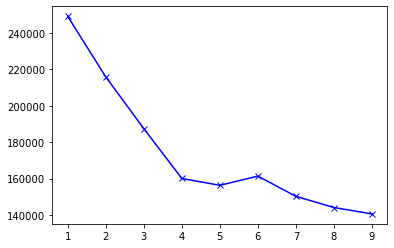

In [75]:
import matplotlib.pyplot as plt

# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose = 1)
    kmode.fit_predict(allcolumns)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.show()

In [14]:
km2_series = pd.Series(km2)

km2_series.value_counts()

3    29520
0    28042
1    25376
2     7706
6     3673
5     2522
4     2398
dtype: int64

In [143]:
df_no_health = df3.drop(columns=["PEDISEAR","PEDISEYE","PEDISOUT","PEDISPHY","PEDISREM","PRDISFLG","HEA","PH_SEQ","COV","COV_CYR","PUB_CYR","DEPPRIV","A_HGA","A_MJIND","A_GRSWK","A_HRSPAY","A_CLSWKR","A_WKSTAT","PERLIS","MOOP2","PHIP_VAL2","PTOTVAL","PEARNVAL"])

df_no_health = df_no_health[df_no_health["AGE1"] > 5]

df_no_health.drop(columns=["AGE1"], inplace= True)

df_no_health.drop(columns=["PEDISDRS"], inplace= True)

df_no_health = df_no_health.assign(Health_Grouping = km2_series.values)

df_no_health = df_no_health.loc[:,~df_no_health.columns.duplicated()]

std = df_no_health["MOOP"].std()

mean = df_no_health["MOOP"].mean()

df_no_health = df_no_health[df_no_health["MOOP"] < df_no_health["MOOP"].std() * 3 + df_no_health["MOOP"].mean()]

bins = [-1,200,1100,3410,std * 3 + mean]
names =[1,2,3,4]
df_no_health["bins"] = pd.cut(df_no_health["MOOP"], bins, labels = names)

In [144]:
df_no_health["bins"].value_counts()

1    25413
2    24526
3    24489
4    23615
Name: bins, dtype: int64

In [103]:
# dummies: PRDTRACE,kmode
# 1,2 to 0,1: PEHSPNON,PEAFEVER,A_SEX,(PUB,GRP,DIR,MRK,NONM,CAID,OTHMT,MCARE,MIL,CHAMPVA,VACARE) different plans
# contious: AGI (Federal adjusted gross income)
# health groupings: kmode
# predictions: MOOP
# added to equal MOOP: PHIP_VAL, POTC_VAL,PMED_VAL

In [107]:
df_no_health1 = df_no_health[["PEAFEVER","PEHSPNON","A_SEX","PUB","GRP","DIR","MRK","NONM","CAID","OTHMT","MCARE","MIL","CHAMPVA","VACARE"]]

df_no_health1.replace({1: 1,2: 0,-1: 0}, inplace=True)

df_no_health1

C:\Users\scotty\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,PEAFEVER,PEHSPNON,A_SEX,PUB,GRP,DIR,MRK,NONM,CAID,OTHMT,MCARE,MIL,CHAMPVA,VACARE
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,1,1,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163533,1,0,1,1,1,0,0,0,0,0,1,0,0,0
163534,0,0,0,1,0,0,0,0,0,0,1,0,0,0
163535,0,1,0,0,0,1,0,1,0,0,0,0,0,0
163536,1,0,1,1,0,0,0,0,0,1,1,0,0,0


In [145]:
df_no_health2 = df_no_health[["PRDTRACE","Health_Grouping"]]

df_dummies = pd.get_dummies(df_no_health2.astype(str) , drop_first= True)

df_dummies

,PRDTRACE_10,PRDTRACE_11,PRDTRACE_12,PRDTRACE_13,PRDTRACE_14,PRDTRACE_15,PRDTRACE_16,PRDTRACE_17,PRDTRACE_18,PRDTRACE_19,...,PRDTRACE_6,PRDTRACE_7,PRDTRACE_8,PRDTRACE_9,Health_Grouping_1,Health_Grouping_2,Health_Grouping_3,Health_Grouping_4,Health_Grouping_5,Health_Grouping_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
163534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
163535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
import numpy as np

In [147]:
Moop_series = pd.Series(df_no_health["MOOP"])
AGI_series = pd.Series(df_no_health["AGI"])
PHIP_VAL_series = pd.Series(df_no_health["PHIP_VAL"])
PMED_VAL_series = pd.Series(df_no_health["PMED_VAL"])
POTC_VAL_series = pd.Series(df_no_health["POTC_VAL"])
bins_series = pd.Series (df_no_health["bins"])

In [111]:
Moop_series.max()

16350

In [90]:
bins_series.value_counts()

2    24526
3    24489
4    21436
1    16691
Name: bins, dtype: int64

In [91]:
PHIP_VAL_series.value_counts()

0       48986
1200     2144
2400     1959
3000     1887
6000     1489
        ...  
4430        1
5824        1
4845        1
2581        1
674         1
Name: PHIP_VAL, Length: 2111, dtype: int64

In [92]:
PMED_VAL_series.value_counts()

0       28493
500      7262
200      6565
100      6246
1000     5559
        ...  
76          1
238         1
1980        1
879         1
1392        1
Name: PMED_VAL, Length: 995, dtype: int64

In [93]:
POTC_VAL_series.value_counts()

0       18165
100     16751
50      11230
200      9906
300      4479
        ...  
1001        1
108         1
680         1
223         1
756         1
Name: POTC_VAL, Length: 365, dtype: int64

In [126]:
df_predict_MOOP = pd.concat([df_no_health1,df_dummies,AGI_series], axis=1)
df_predict_PHIP_VAL = pd.concat([df_no_health1,df_dummies,AGI_series], axis=1)
df_predict_PMED_VAL = pd.concat([df_no_health1,df_dummies,AGI_series], axis=1)
df_predict_POTC_VAL = pd.concat([df_no_health1,df_dummies,AGI_series], axis=1)
df_predict_bins = pd.concat([df_no_health1,df_dummies,AGI_series], axis=1)

In [95]:
X = df_predict_MOOP

y = Moop_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

reg_line = LinearRegression().fit(X_train, y_train)

reg_grade = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

reg_forest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

y_predict_line = reg_line.predict(X_test)

y_predict_grade = reg_grade.predict(X_test)

y_predict_forest = reg_forest.predict(X_test)

print(r2_score(y_test,y_predict_line))

print(r2_score(y_test,y_predict_grade))

print(r2_score(y_test,y_predict_forest))

0.12457333877083843
0.1378444229185406
0.10743697790059892


In [96]:
X = df_predict_PHIP_VAL

y = PHIP_VAL_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

reg_line = LinearRegression().fit(X_train, y_train)

reg_grade = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

reg_forest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

y_predict_line = reg_line.predict(X_test)

y_predict_grade = reg_grade.predict(X_test)

y_predict_forest = reg_forest.predict(X_test)

print(r2_score(y_test,y_predict_line))

print(r2_score(y_test,y_predict_grade))

print(r2_score(y_test,y_predict_forest))

0.1131823294685681
0.12568829232610634
0.08518831985030406


In [97]:
X = df_predict_PMED_VAL

y = PMED_VAL_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

reg_line = LinearRegression().fit(X_train, y_train)

reg_grade = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

reg_forest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

y_predict_line = reg_line.predict(X_test)

y_predict_grade = reg_grade.predict(X_test)

y_predict_forest = reg_forest.predict(X_test)

print(r2_score(y_test,y_predict_line))

print(r2_score(y_test,y_predict_grade))

print(r2_score(y_test,y_predict_forest))

0.04109356866002012
0.04902518316576032
0.02749489109164871


In [167]:
X = df_predict_POTC_VAL

y = POTC_VAL_series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

reg_line = LinearRegression().fit(X_train, y_train)

reg_grade = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

reg_forest = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

y_predict_line = reg_line.predict(X_test)

y_predict_grade = reg_grade.predict(X_test)

y_predict_forest = reg_forest.predict(X_test)

print(r2_score(y_test,y_predict_line))

print(r2_score(y_test,y_predict_grade))

print(r2_score(y_test,y_predict_forest))

0.01145038949870536
0.007067420429224813
0.007784935375428459


In [171]:
X = df_predict_bins

y = bins_series

random_forest = RandomForestClassifier(max_depth = 5, random_state = 10).fit(X,y)

log_reg = LogisticRegression(random_state=0).fit(X, y)

print(log_reg.score(X, y))

print(random_forest.score(X, y))

0.2960741715369787
0.3890333833114042


In [172]:
from joblib import dump

dump(random_forest,"RandomForestClassifier.joblib.model")

dump(km2,"Kmodes.joblib.model")

['Kmodes.joblib.model']